In [1]:
# importing llibraries 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
fire = pd.read_csv("forestfires.csv")
fire.shape

(517, 31)

In [4]:
fire.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [5]:
fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [6]:
fire.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [7]:
fire[fire.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [9]:
fire_1 = fire[~fire.duplicated()]
fire_1

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


<AxesSubplot:>

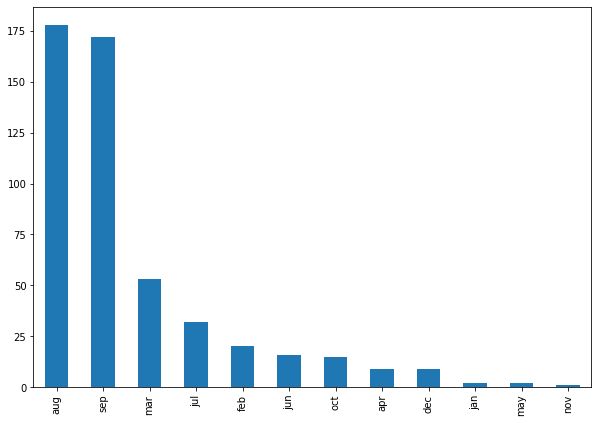

In [10]:
fig = plt.figure(figsize=(10,7))
fire_1.month.value_counts().plot.bar()

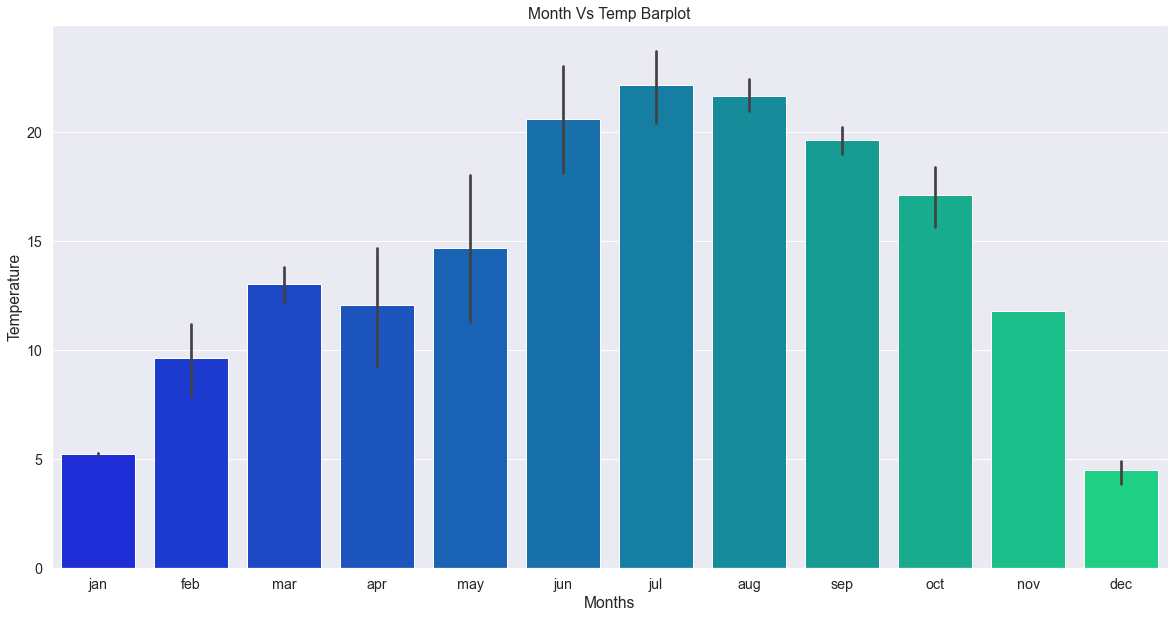

In [11]:
# plotting month vs temp plot 


plt.rcParams['figure.figsize'] = [20,10]
sns.set(style = "darkgrid", font_scale =1.3)
month_temp = sns.barplot(x= 'month', y='temp',data=fire_1,
                        order = ['jan','feb','mar','apr','may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov','dec'], palette = 'winter');
month_temp.set(title = "Month Vs Temp Barplot", xlabel = "Months", ylabel = "Temperature");

In [13]:
fire_2 = fire_1.drop(['month','day'],axis=1)
fire_2

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


In [14]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
df = fire_2.iloc[:,:28]
scaler =MinMaxScaler()
fire_norm = scaler.fit_transform(df)

In [19]:
fire_norm.shape

(509, 28)

In [21]:
y = fire_2.iloc[:,28]
y

0      small
1      small
2      small
3      small
4      small
       ...  
512    large
513    large
514    large
515    small
516    small
Name: size_category, Length: 509, dtype: object

In [22]:
x_train, x_test, y_train, y_test=train_test_split(fire_norm,y,test_size=0.30,random_state=50)

# SVM classification

lets use grid search cv to find out best value for param 

training model

In [23]:
clf = SVC()
param_grid = [{"kernel":["rbf"],"gamma":[0.9,0.5,0.1],"C":[1,10,100]},
             
             {"kernel":["linear"],"gamma":[0.9,0.5,0.1],"C":[1,10,100]}]
gsv = GridSearchCV(clf,param_grid,cv=10,n_jobs=-1)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [1, 10, 100], 'gamma': [0.9, 0.5, 0.1],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100], 'gamma': [0.9, 0.5, 0.1],
                          'kernel': ['linear']}])

In [24]:
gsv.best_params_,gsv.best_score_

({'C': 100, 'gamma': 0.9, 'kernel': 'linear'}, 0.8484126984126984)

In [25]:
clf = SVC()
param_grid = [{'kernel':['poly'],'gamma':[0.9,0.5,0.1],'C':[1,10,100] },
             {'kernel':['sigmoid'],'gamma':[0.9,0.5,0.1],'C':[1,10,100]},
             ]
gsv = GridSearchCV(clf,param_grid,cv=10,n_jobs=-1)
gsv.fit(x_train,y_train)

gsv.best_params_ , gsv.best_score_ 

({'C': 100, 'gamma': 0.9, 'kernel': 'poly'}, 0.800952380952381)

In [29]:
# SVM classification

clf_t =SVC(C=100, kernel='linear',gamma=0.9)
clf_t.fit(x_train,y_train)
results_train = clf_t.score(x_train,y_train)
print(np.round(results_train,4))

0.8511


# Testing Model

In [30]:
#SVM Clasification
clf_t = SVC(C=100, kernel='linear',gamma=0.9)
clf_t.fit(x_test,y_test)
results_test = clf_t.score(x_test,y_test)
print(np.round(results_train, 4))

0.8511


# using accuracy_score methoed

In [31]:
svm = SVC (kernel ="linear",random_state =0,gamma=0.9,C = 100)
svm.fit(x_train,y_train)

SVC(C=100, gamma=0.9, kernel='linear', random_state=0)

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [33]:
y_pred_test= svm.predict(x_test)
y_pred_test

array(['small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'large', 'large', 'small', 'small', 'small', 'small', 'large',
       'small', 'large', 'small', 'small', 'small', 'small', 'small',
       'small', 'large', 'small', 'small', 'large', 'small', 'large',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'large', 'small', 'small', 'small', 'large',
       'small', 'small', 'small', 'small', 'large', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'large', 'small',
       'small', 'large', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'large',
       'small', 'sma

In [39]:
result_test=accuracy_score(y_test,y_pred_test)*100
result_test


87.58169934640523

In [40]:
y_pred_train = svm.predict(x_train)
y_pred_train

array(['large', 'small', 'large', 'small', 'small', 'small', 'small',
       'large', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'large', 'small', 'large',
       'small', 'small', 'small', 'small', 'large', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'large', 'small',
       'small', 'large', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'large', 'small', 'small',
       'small', 'small', 'small', 'small', 'large', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'large', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'sma

In [41]:
result_train =accuracy_score(y_test,y_pred_test)*100
result_train

87.58169934640523

In [42]:
result_train =accuracy_score(y_test,y_pred_test)*100
result_train

87.58169934640523

In [43]:
# Accuracy_score method
print("Accuracy of training data:- ", np.round(result_train, 4),
     "\nAccuracy of testing data:- ", np.round(result_test, 4))

Accuracy of training data:-  87.5817 
Accuracy of testing data:-  87.5817


In [44]:
print("Accuracy of training data:- ", np.round(results_train, 4),
     "\nAccuracy of testing data:- ", np.round(results_test, 4))

Accuracy of training data:-  0.8511 
Accuracy of testing data:-  0.8627
